<a href="https://colab.research.google.com/github/AdlerFarHorizons/ISGC-internship/blob/main/challenges/darkframe_coding_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Darkframe-Identification Challenge

You will write code to identify whether an image is a "dark frame", i.e. mostly black, or whether it has visible content.
To start, run the setup and then take a look at the images.

# Setup

Run this section, but you shouldn't try to read or understand it.

In [29]:
import os

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [9]:
!git clone https://github.com/AdlerFarHorizons/ISGC-internship.git

Cloning into 'ISGC-internship'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 7.18 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [13]:
image_dir = 'ISGC-internship/data/images'

In [24]:
def load_img(filename):
  full_img = cv2.imread(os.path.join(image_dir, filename), cv2.IMREAD_UNCHANGED)
  scaled_img = full_img / np.iinfo(full_img.dtype).max
  green_band = scaled_img[:,:,1]
  return green_band

In [46]:
test_img = load_img('20220413_231534_1639653915_1_100_0.tiff')

# The Images

Take a look below at the two images you will be basing your code on. Visually, you can see that one of them is pitch black, and the other has distinguishable features.
After you take a look at the images, scroll to the next section.

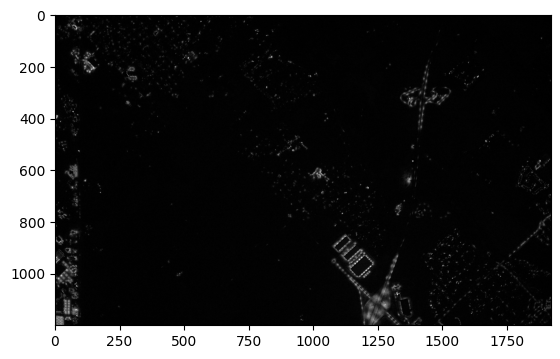

In [36]:
normal_img = load_img('20220413_232456_1732660597_1_100_0.tiff')
plt.imshow(normal_img, cmap='Greys_r', vmin=0, vmax=1)

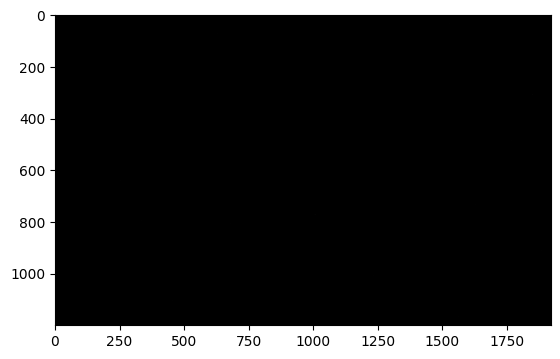

In [37]:
darkframe_img = load_img('20220413_202939_18879319_1_100_0.tiff')
plt.imshow(darkframe_img, cmap='Greys_r', vmin=0, vmax=1)

# Arrays

To work with images, we must first understand arrays.
An array is a list of lists.
An example is below.

In [41]:
example_arr = [
    [ 1., 2., 3., ],
    [ 3., 5., 6., ],
]
print(example_arr)

[[1.0, 2.0, 3.0], [3.0, 5.0, 6.0]]


Typically arrays are manipulated using `numpy` (numerical python).
Here's the example_arr as a numpy array.

In [42]:
example_arr = np.array(example_arr)
print(example_arr)

[[1. 2. 3.]
 [3. 5. 6.]]


To manipulate arrays, you have to use loops.
Here's an example, where we loop through and print each row of the array.

In [43]:
for i in range(example_arr.shape[0]):
  print(f'row {i} = {example_arr[i]}')

row 0 = [1. 2. 3.]
row 1 = [3. 5. 6.]


# Images as Arrays

Images are actually arrays themselves!
Each pixel corresponds to an individual entry in an array.

In [44]:
print(normal_img)

[[0.00610361 0.00903334 0.01220722 ... 0.         0.         0.        ]
 [0.00292973 0.00610361 0.01220722 ... 0.00610361 0.00292973 0.00292973]
 [0.         0.00903334 0.01513695 ... 0.00903334 0.00610361 0.00610361]
 ...
 [0.04541085 0.0302739  0.03735409 ... 0.01049821 0.00903334 0.00903334]
 [0.05688563 0.04419013 0.05127031 ... 0.00292973 0.00146487 0.00146487]
 [0.05688563 0.04419013 0.05127031 ... 0.00292973 0.00146487 0.00146487]]


The values range between 0 and 1, with 0 being no light and 1 being as bright as our camera can read.

# Your Code

Come up with a function (likely using loops) that takes in and image and returns a value of `True` if you estimate the image is a darkframe, and `False` if you estimate the image is not a darkframe.
Use this function on `test_img` (loaded above but not shown above) without looking at the content of `test_img`, and then look at `test_img` and see if your function classified it correctly.